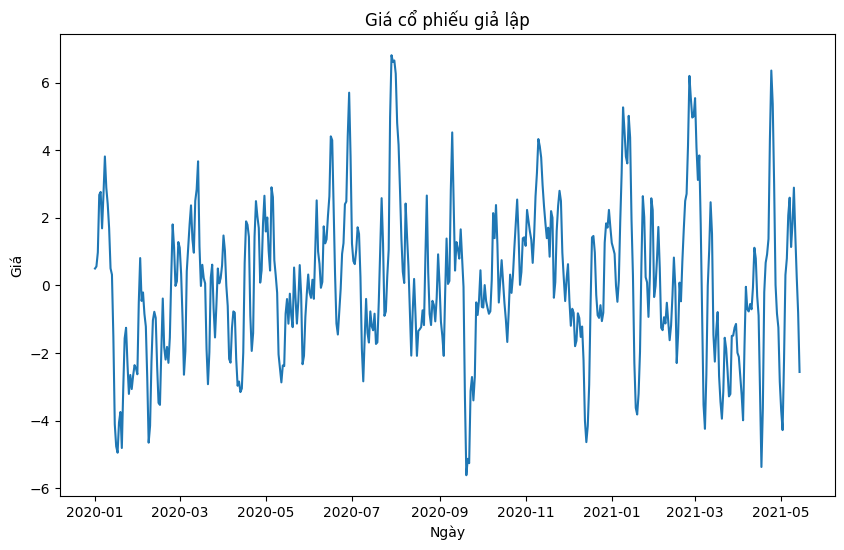

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess

# Thiết lập seed để tái tạo kết quả
np.random.seed(42)

# Định nghĩa tham số cho mô hình ARMA
ar_params = np.array([1, -0.75])
ma_params = np.array([1, 0.65])

# Tạo chuỗi thời gian từ mô hình ARMA
arma_process = ArmaProcess(ar_params, ma_params)
simulated_data = arma_process.generate_sample(nsample=500)

# Tạo DataFrame để dễ dàng thao tác
dates = pd.date_range(start='2020-01-01', periods=500)
data = pd.DataFrame(simulated_data, index=dates, columns=['price'])

# Vẽ chuỗi thời gian giả lập
plt.figure(figsize=(10, 6))
plt.plot(data['price'])
plt.title('Giá cổ phiếu giả lập')
plt.xlabel('Ngày')
plt.ylabel('Giá')
plt.show()


In [3]:
from statsmodels.tsa.stattools import adfuller

# Kiểm tra tính dừng của chuỗi thời gian
result = adfuller(data['price'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: -7.023585021067115
p-value: 6.449399299017504e-10


In [4]:
from statsmodels.tsa.arima.model import ARIMA

# Xác định mô hình ARMA
model = ARIMA(data['price'], order=(2, 0, 1))
model_fit = model.fit()

# In tóm tắt kết quả mô hình
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                  500
Model:                 ARIMA(2, 0, 1)   Log Likelihood                -699.957
Date:                Mon, 27 May 2024   AIC                           1409.914
Time:                        16:30:42   BIC                           1430.987
Sample:                    01-01-2020   HQIC                          1418.183
                         - 05-14-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0479      0.278      0.172      0.863      -0.497       0.592
ar.L1          0.6922      0.076      9.107      0.000       0.543       0.841
ar.L2          0.0353      0.072      0.489      0.6

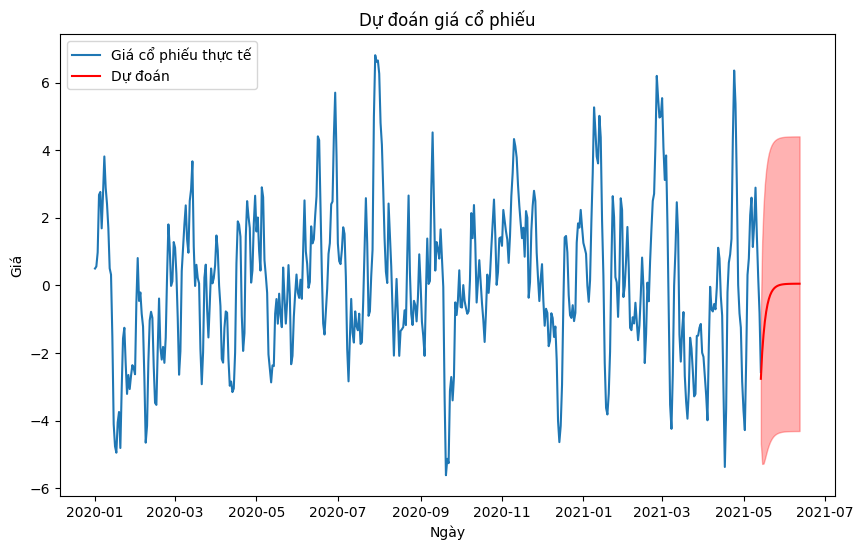

In [5]:
# Dự đoán giá cổ phiếu trong tương lai
forecast = model_fit.get_forecast(steps=30)
forecast_index = pd.date_range(start=data.index[-1], periods=30, freq='D')
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Vẽ kết quả dự đoán
plt.figure(figsize=(10, 6))
plt.plot(data['price'], label='Giá cổ phiếu thực tế')
plt.plot(forecast_index, forecast_values, label='Dự đoán', color='red')
plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='red', alpha=0.3)
plt.legend()
plt.title('Dự đoán giá cổ phiếu')
plt.xlabel('Ngày')
plt.ylabel('Giá')
plt.show()


In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Tính toán các chỉ số đánh giá
actual = data['price'][-30:]
predicted = forecast_values[:30]

mae = mean_absolute_error(actual, predicted)
mse = mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)

print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)


Mean Absolute Error (MAE): 2.1834260533999013
Mean Squared Error (MSE): 7.201047125835246
Root Mean Squared Error (RMSE): 2.683476686285023
